# MATTER OF STUDY

### Define the distribution of returns of major asset classes in the United States of America.
### Identify its correlation with inflation and the value of the dollar against a basket of other currencies.

# GATHERING DATA

## Downloading datasets regarding the following asset classes: 

* US Stocks
* Cash
* US Total Bond
* Long-Term Corporate Bonds
* REITS
* Gold

## Data Sources: 

US STOCKS: 

AQR US MKT Factor Returns 1972-1992 (AQR Data Sets)
Vanguard Total Stock Market Index Fund (VTSMX) 1993+

CASH: 

3-month Treasury Bills (FRED Data) 1972+

TOTAL BOND MARKET:

Vanguard Total Bond Market Index Fund (VBMFX) 1987+

LONG TERM CORPORATE BONDS:

Vanguard Long-Term Investment Grade Fund (VWESX) 1974+

GOLD: 

Gold Fixing Price in London Bullion Market 3:00 PM (London time) 1972-2004
SPDR Gold Shares (GLD) 2005+

REITS: 

DFA Real Estate Securities I (DFREX) 1994-1996
Vanguard REIT Index Fund (VGSIX) 1997+

## Importing pandas to download dataset from HTML


In [2]:
import pandas as pd

### Using pandas to read online data and importing 

In [3]:
url = "https://www.portfoliovisualizer.com/historical-asset-class-returns"
asset_class_returns = pd.read_html(url)[0]

### Filtering the dataframe for the columns under study 

In [4]:
asset_class_returns = asset_class_returns[['Year', 'Inflation', 'US Stock Market', 'Cash', 'Total US Bond Market', 'Long-Term Corporate Bonds', 'REIT', 'Gold']]

### Dropping all years where datas is missing, then proceding to drop 2023 data which is incomplete 

In [5]:
asset_class_returns.dropna(inplace=True)
asset_class_returns.drop(asset_class_returns.tail(2).index,inplace=True)

### We now have a clean dataset with all asset classes' returns over 1994 to 2022


In [6]:
asset_class_returns = asset_class_returns.reset_index(drop=True)

asset_class_returns.tail(5)

,Year,Inflation,US Stock Market,Cash,Total US Bond Market,Long-Term Corporate Bonds,REIT,Gold
24,2018,1.91%,-5.26%,1.90%,-0.13%,-5.95%,-6.11%,-1.94%
25,2019,2.29%,30.65%,2.13%,8.61%,20.41%,28.78%,17.86%
26,2020,1.36%,20.87%,0.44%,7.61%,15.36%,-4.78%,24.81%
27,2021,7.04%,25.59%,0.04%,-1.77%,-2.38%,40.19%,-4.15%
28,2022,6.45%,-19.60%,1.82%,-13.25%,-25.62%,-26.30%,-0.77%


# DATA CLEANING

### To work with the dataset it is necessary to clean it, 
### each recorded observation has the "%" symbol next to the number,
### in order to work with it it's necessary to remove it

In [8]:
for col in list(asset_class_returns.columns):
    asset_class_returns[col] = asset_class_returns[col].str.replace("%", "")

### Some valeus are strings, so it's necessary to convert them into numeric values


In [9]:
asset_class_returns = asset_class_returns.astype("float64")

# ANALYZING PHASE

## Now that we have asset class returns over years it's important to convert adjust them for inflation

### First creating a backup of our dataframe not adjusted for inflation, then we can modify the main dataframe.

In [11]:
asset_class_returns_not_adjusted = asset_class_returns

columns = list(asset_class_returns.columns)[2:7]

for col in list(columns):
    for i in range(len(asset_class_returns)):
        asset_class_returns[col][i] =  asset_class_returns[col][i] - asset_class_returns['Inflation'][i]

## We want to classify returns in ranges so that we can create distribution visualizations

In [13]:
bins = [-float('inf'),-25, -20, -15, -10, -5, -2.5, 0, 2.5, 5, 10, 15, 20, 25, 30, float('inf')]
labels_to_use = ["-30", "-25", "-20", "-15", "-10", "-5", "-2.5", "0", "2.5", "5", "10", "15", "20", "25", "30"]

inflation_per_year = pd.cut(asset_class_returns['Inflation'], bins=bins, labels=labels_to_use)
stocks_returns = pd.cut(asset_class_returns['US Stock Market'], bins=bins, labels=labels_to_use)
cash_returns = pd.cut(asset_class_returns['Cash'], bins=bins, labels=labels_to_use)
us_bonds_returns = pd.cut(asset_class_returns['Total US Bond Market'], bins=bins, labels=labels_to_use)
corporate_bonds_returns = pd.cut(asset_class_returns['Long-Term Corporate Bonds'], bins=bins, labels=labels_to_use)
reits_returns= pd.cut(asset_class_returns['REIT'], bins=bins, labels=labels_to_use)
gold_returns = pd.cut(asset_class_returns['Gold'], bins=bins, labels=labels_to_use)

def create_df(year,asset_class):
    list_tuples = list(zip(year, asset_class))
    df = pd.DataFrame(list_tuples, columns=['Year', 'Returns']).groupby(by='Returns', as_index=False).count()
    df = df.astype("float64")
    df = df.sort_values('Returns',ascending=True)
    df.rename(columns={'Year': 'Count'}, inplace=True)
    df['Returns'] = df['Returns'].astype('string')

    return df

inflation_df = create_df(asset_class_returns['Year'], inflation_per_year)
stocks_df = create_df(asset_class_returns['Year'], stocks_returns)
cash_df = create_df(asset_class_returns['Year'], cash_returns)
us_bonds_df = create_df(asset_class_returns['Year'], us_bonds_returns)
corporate_bonds_df = create_df(asset_class_returns['Year'], corporate_bonds_returns)
reits_df = create_df(asset_class_returns['Year'], reits_returns)
gold_df = create_df(asset_class_returns['Year'], gold_returns)

# DATA VISUALIZATIONS 

## Importing libraries to create plots 

In [14]:
from matplotlib import pyplot as plt

## Creating plots for each asset class

### Stocks

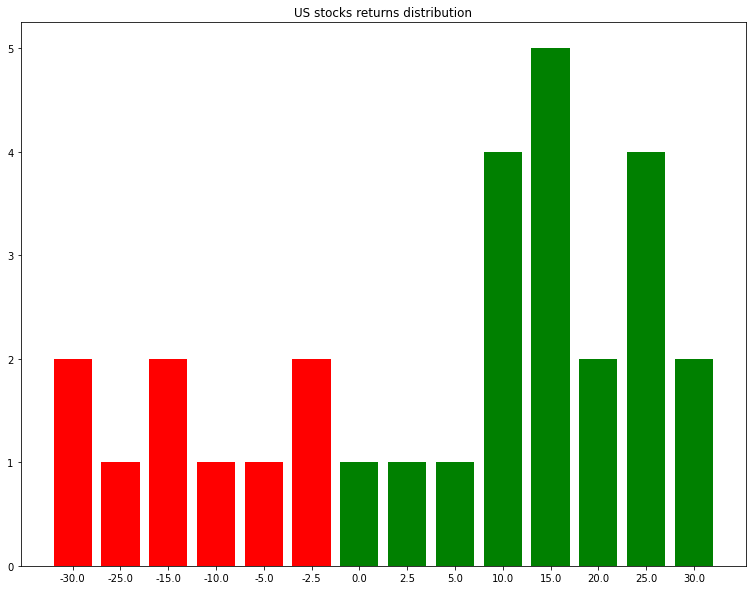

In [36]:
plt.bar(stocks_df['Returns'], stocks_df['Count'], color=['red' if float(r) < 0 else 'green' for r in stocks_df['Returns']])
plt.title('US stocks returns distribution')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### Cash 

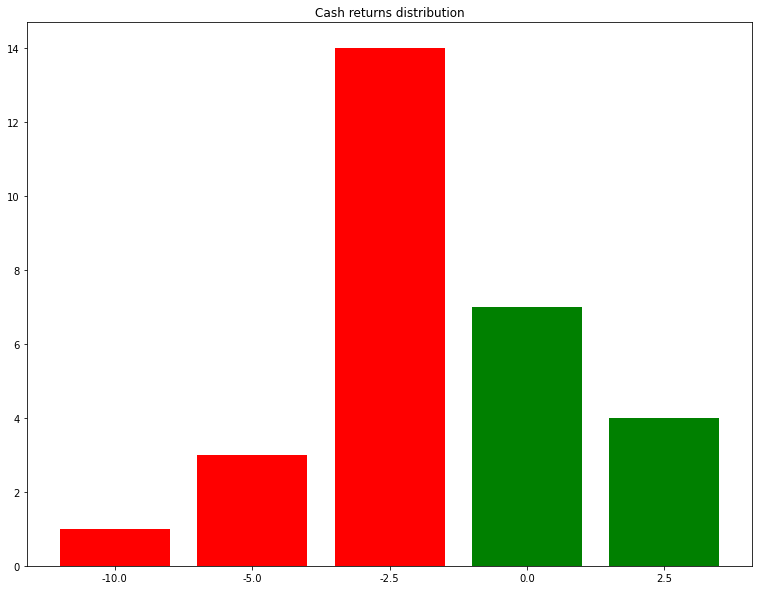

In [37]:
plt.bar(cash_df['Returns'], cash_df['Count'], color=['red' if float(r) < 0 else 'green' for r in cash_df['Returns']])
plt.title('Cash returns distribution')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### US Bonds

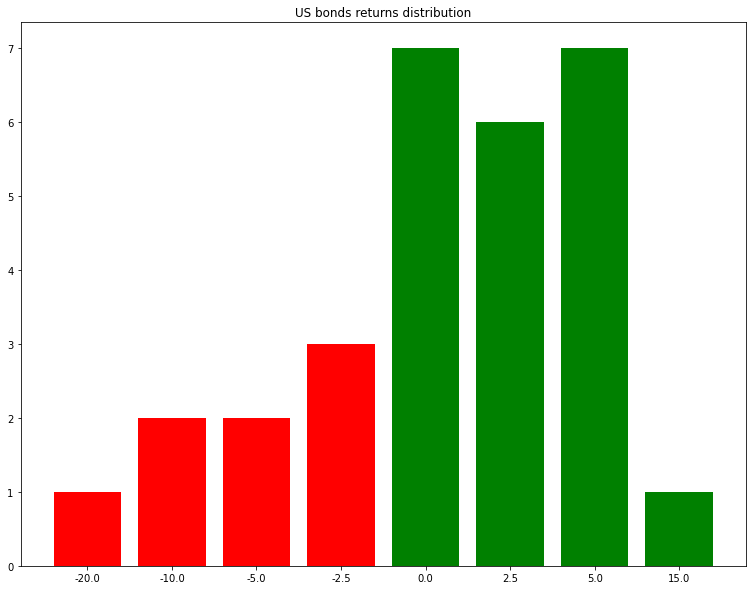

In [38]:
plt.bar(us_bonds_df['Returns'], us_bonds_df['Count'], color=['red' if float(r) < 0 else 'green' for r in us_bonds_df['Returns']])
plt.title('US bonds returns distribution')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### Corporate Bonds

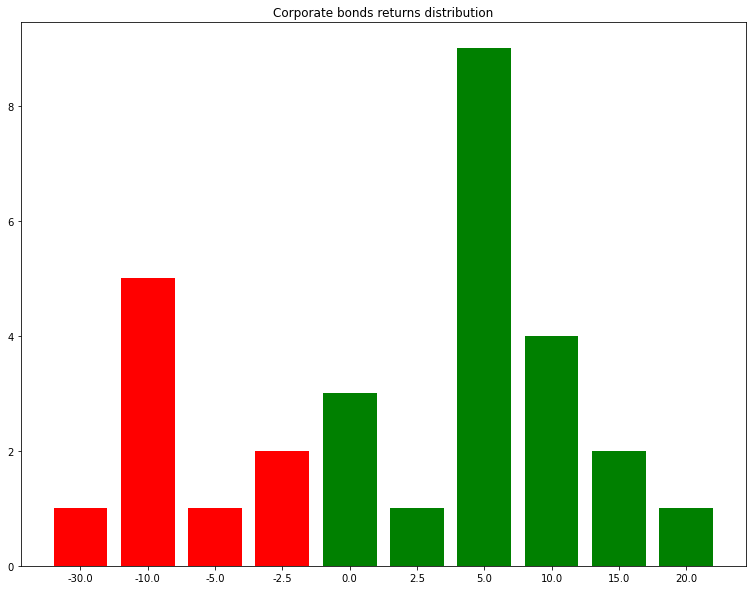

In [39]:
plt.bar(corporate_bonds_df['Returns'], corporate_bonds_df['Count'], color=['red' if float(r) < 0 else 'green' for r in corporate_bonds_df['Returns']])
plt.title('Corporate bonds returns distribution')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### REITS

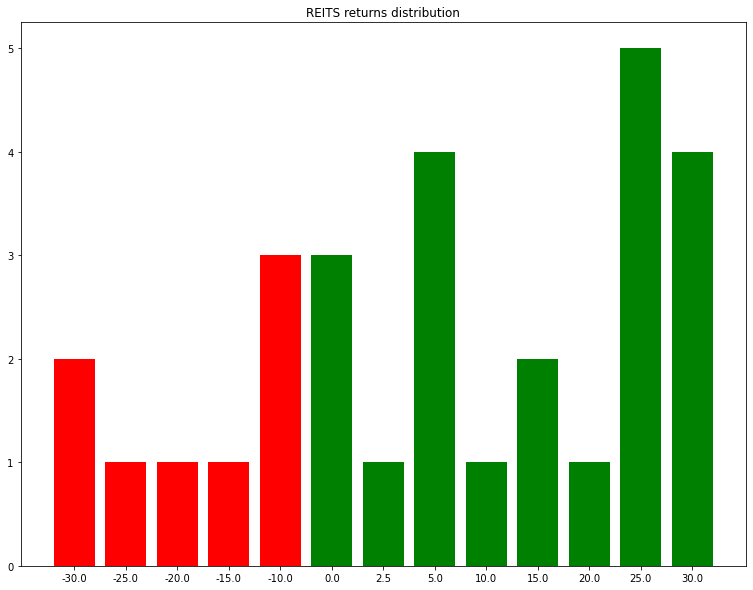

In [40]:
plt.bar(reits_df['Returns'], reits_df['Count'], color=['red' if float(r) < 0 else 'green' for r in reits_df['Returns']])
plt.title('REITS returns distribution')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### Gold


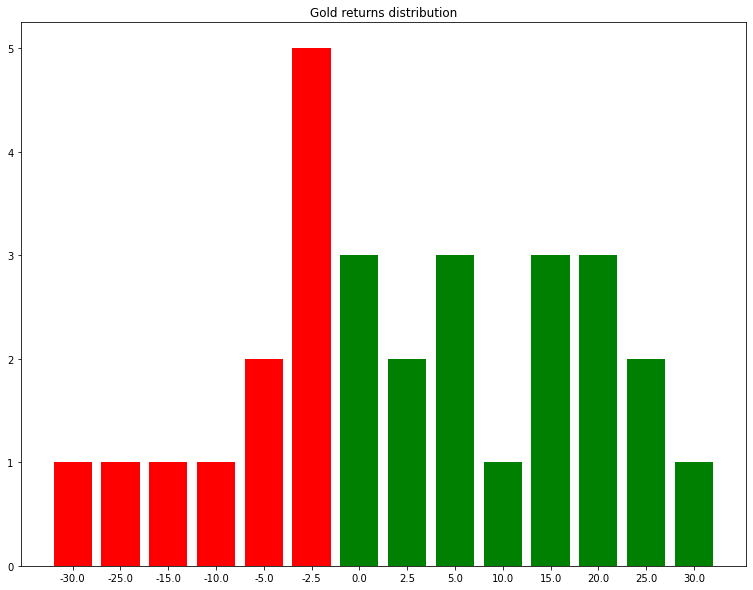

In [41]:
plt.bar(gold_df['Returns'], gold_df['Count'], color=['red' if float(r) < 0 else 'green' for r in gold_df['Returns']])
plt.title('Gold returns distribution')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

## Now it's time to analyze correlation with inflation rates

### Creating a table with each asset class correlation

In [42]:
asset_class_returns_not_adjusted.drop('Year', axis=1, inplace=True)
correlation_table = asset_class_returns_not_adjusted.corr().round(2)

### Stocks

Analyizing correlation between US Stock Market and other asset classes
Inflation                   -0.08
US Stock Market              1.00
Cash                         0.05
Total US Bond Market         0.24
Long-Term Corporate Bonds    0.34
REIT                         0.53
Gold                        -0.05
Name: US Stock Market, dtype: float64


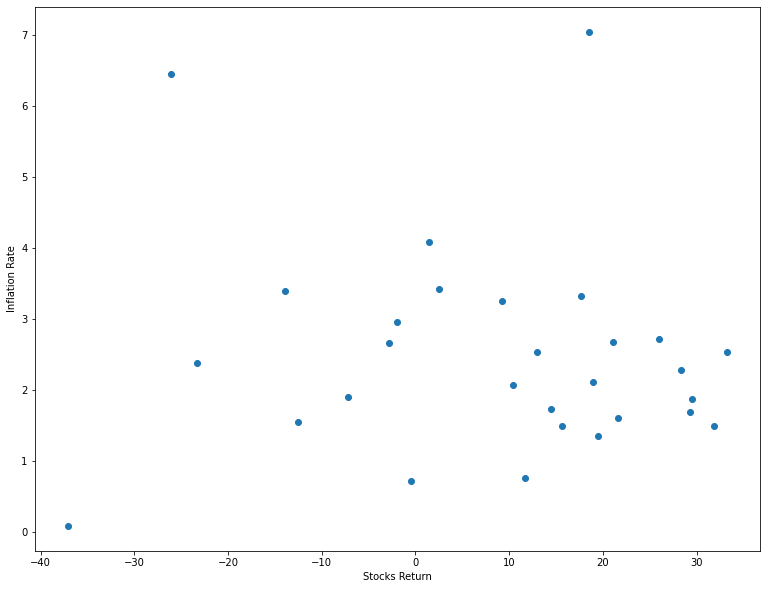

In [43]:
print("Analyizing correlation between US Stock Market and other asset classes")

correlation = correlation_table['US Stock Market']
print(correlation)

plt.scatter(asset_class_returns['US Stock Market'],asset_class_returns['Inflation'])
plt.xlabel('Stocks Return')
plt.ylabel('Inflation Rate')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### Cash

Analyizing correlation between cash and asset classes
Inflation                   -0.50
US Stock Market              0.05
Cash                         1.00
Total US Bond Market         0.58
Long-Term Corporate Bonds    0.32
REIT                        -0.11
Gold                        -0.15
Name: Cash, dtype: float64


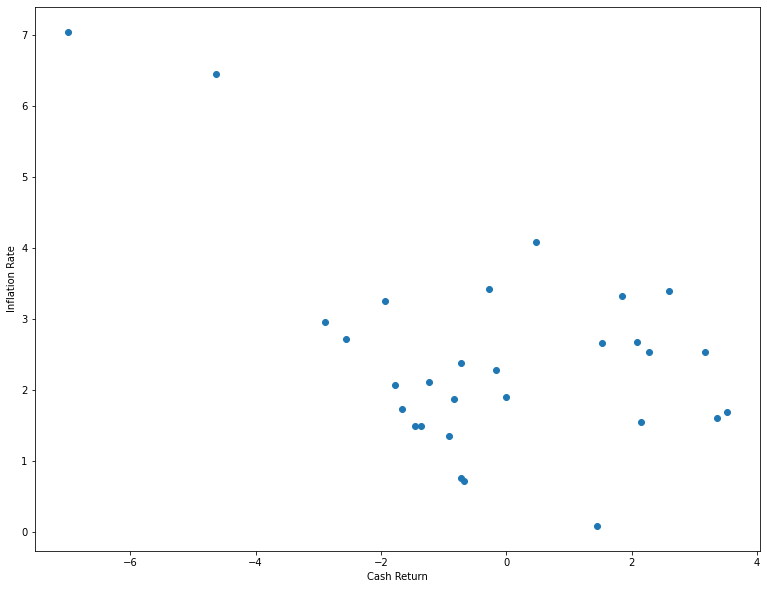

In [44]:
print("Analyizing correlation between cash and asset classes")

correlation = correlation_table['Cash']
print(correlation)

plt.scatter(asset_class_returns['Cash'],asset_class_returns['Inflation'])
plt.xlabel('Cash Return')
plt.ylabel('Inflation Rate')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### US Bonds

Analyizing correlation between US Bonds and asset classes
Inflation                   -0.59
US Stock Market              0.24
Cash                         0.58
Total US Bond Market         1.00
Long-Term Corporate Bonds    0.92
REIT                         0.26
Gold                         0.21
Name: Total US Bond Market, dtype: float64


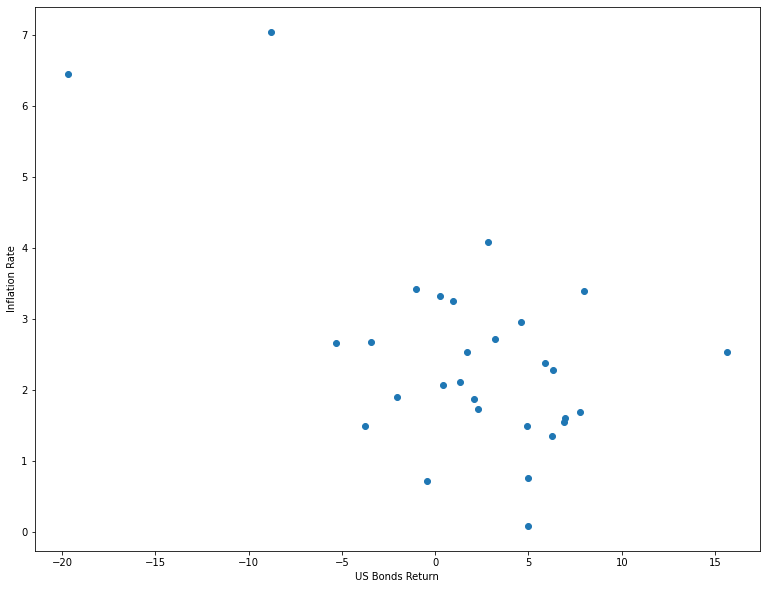

In [46]:
print("Analyizing correlation between US Bonds and asset classes")

correlation = correlation_table['Total US Bond Market']
print(correlation)

plt.scatter(asset_class_returns['Total US Bond Market'],asset_class_returns['Inflation'])
plt.xlabel('US Bonds Return')
plt.ylabel('Inflation Rate')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()


### Corporate Bonds

Analyizing correlation between Corporate Bonds and asset classes
Inflation                   -0.53
US Stock Market              0.34
Cash                         0.32
Total US Bond Market         0.92
Long-Term Corporate Bonds    1.00
REIT                         0.40
Gold                         0.27
Name: Long-Term Corporate Bonds, dtype: float64


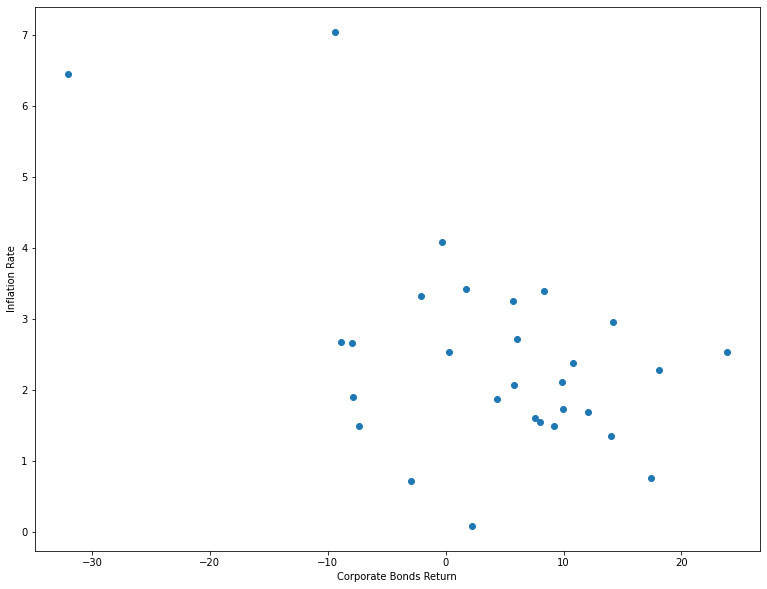

In [47]:
print("Analyizing correlation between Corporate Bonds and asset classes")

correlation = correlation_table['Long-Term Corporate Bonds']
print(correlation)

plt.scatter(asset_class_returns['Long-Term Corporate Bonds'],asset_class_returns['Inflation'])
plt.xlabel('Corporate Bonds Return')
plt.ylabel('Inflation Rate')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()


### REITS

Analyizing correlation between REITS and asset classes
Inflation                    0.05
US Stock Market              0.53
Cash                        -0.11
Total US Bond Market         0.26
Long-Term Corporate Bonds    0.40
REIT                         1.00
Gold                         0.09
Name: REIT, dtype: float64


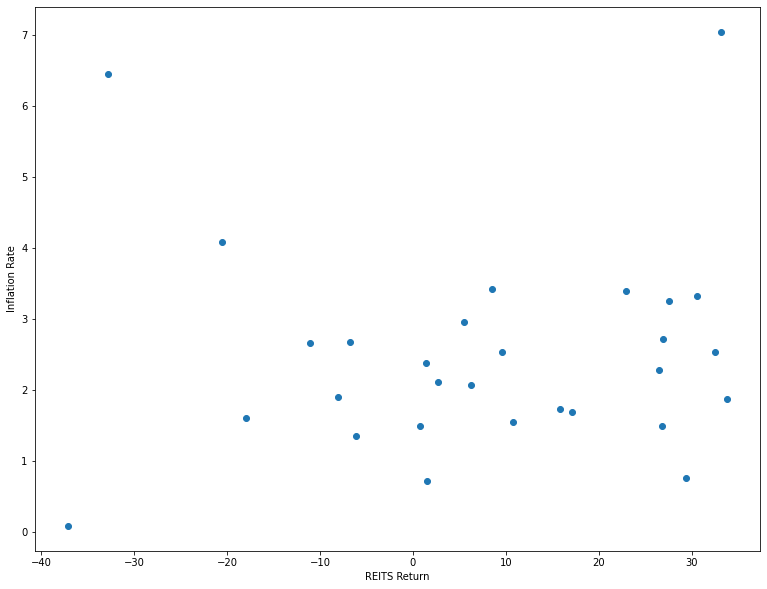

In [48]:
print("Analyizing correlation between REITS and asset classes")

correlation = correlation_table['REIT']
print(correlation)

plt.scatter(asset_class_returns['REIT'],asset_class_returns['Inflation'])
plt.xlabel('REITS Return')
plt.ylabel('Inflation Rate')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### Gold

Analyizing correlation between Gold and asset classes
Inflation                    0.03
US Stock Market             -0.05
Cash                        -0.15
Total US Bond Market         0.21
Long-Term Corporate Bonds    0.27
REIT                         0.09
Gold                         1.00
Name: Gold, dtype: float64


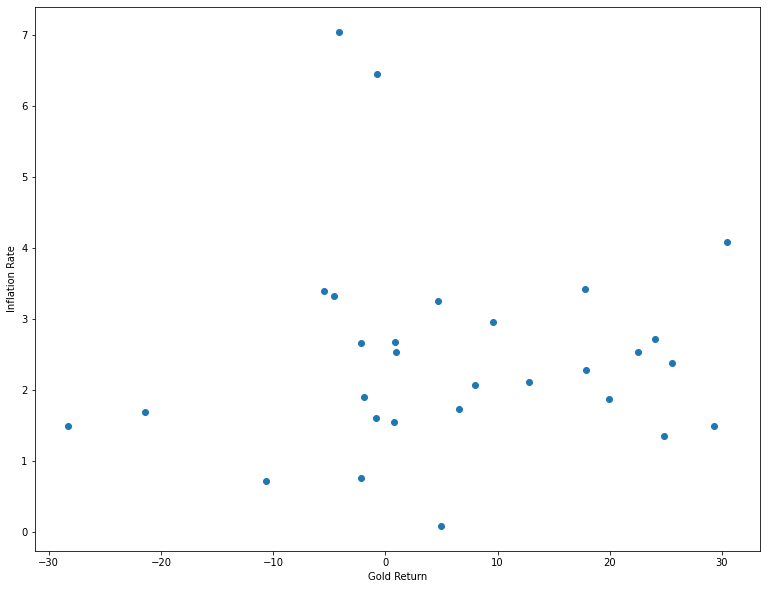

In [50]:
print("Analyizing correlation between Gold and asset classes")

correlation = correlation_table['Gold']
print(correlation)

plt.scatter(asset_class_returns['Gold'],asset_class_returns['Inflation'])
plt.xlabel('Gold Return')
plt.ylabel('Inflation Rate')
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

# FINAL CONSIDERATIONS 

### From the elaborated graphs we can see that for many asset classes there is no clear correlation between inflation and returns. What is surprising above all is gold, known for being the safe haven asset par excellence, but the data show years with an high inflation,and less-than-satisfactory gold performance.

### Not surprisingly, returns on corporate bonds appear to be highly correlated with those on the government bond market.
### When the yield on treasuries increases, the risk premium required for corporate bonds increases.

### The most important point of the research is the almost disappearance of a clear inverse relationship between stock and bond performance.
### Bonds don't appear to be inversely correlated to the stock market in a long time, and that's due to central banks' use of interest rates over the years under observation.